# Classeur multi-classes

Pour pouvoir tester les classeurs multi-classes, nous allons tout d'abord denouveau récupérer les données, utilisé la fonction *to_binaire()* pour 'gender', créer les échantillons aléatoires stratifiés. 

In [12]:
#Chargement des données: Customer.csv
import pandas as pd # importation du module pandas
import numpy as np
#Récupération des données avec la fonction read_csv()
customers = pd.read_csv("Data_traites.csv") 
customers_test = pd.read_csv("Test_traites.csv")
country_population = pd.read_csv("CountryPopulation.csv")
country_PIB = pd.read_csv("CountryGDP.csv")

In [13]:
def to_binaire(data):
    newcolonne = []
    for valeur in data["gender"]:
        if(valeur == 'Masc'):
            valeur = '0'
        else:
            valeur = '1'
        newcolonne.append(pd.to_numeric(valeur, errors = 'coerce'))
    data["gender"] = newcolonne
        
customers_copy = customers.copy()
test_copy = customers_test.copy()

to_binaire(customers_copy)
to_binaire(test_copy)

## Variable multi-classes

Au lieu de modifier notre variable 'revenue' en binaire, nous allons la diviser en trois classes : revenu faible (0), revenu moyen (1), revenu élevé (2). Pour créer nos trois classes, on utilise la fonction **qcut()** qui va diviser notre variable en trois données (0, 1 et 2) selon les quartiles.

In [14]:
#transformation de la variable 'revenue' en variable multi-classes
customers_copy["revenue"]=pd.qcut(customers_copy.revenue,3,labels=["0","1",
   "2"])
test_copy["revenue"]=pd.qcut(test_copy.revenue,3,labels=["0","1",
   "2"])

#Vérification du changement de la variable
print(customers_copy)
print(test_copy)

       age  pages  first_item_prize  gender  ReBuy  News_click     country  \
9254  36.0    6.0              10.0       0  False         3.0       Ghana   
1561  36.0    6.0              22.0       0   True         4.0  Bangladesh   
1670  38.0    3.0              44.0       1  False         3.0      Russia   
6087  36.0    4.0              15.5       0  False        10.0   Argentina   
6669  40.0    4.0              15.5       1  False         7.0       Sudan   
...    ...    ...               ...     ...    ...         ...         ...   
5734  48.0    7.0              44.0       0   True         6.0    Tanzania   
5191  25.0   10.0              22.0       1  False         2.0    Colombia   
5390  34.0    3.0              28.0       0  False         6.0       Spain   
860   37.0    7.0              10.0       0  False         8.0      Brazil   
7270  49.0    4.0              15.5       0   True         3.0        Iraq   

     revenue  
9254       0  
1561       0  
1670       1  
608

In [15]:
from sklearn.preprocessing import FunctionTransformer

#Création de la fonction pour merge
def add_extra_features(data, add_PIB = True):
    #Merge CountryPopulation à data par rapport à la variable 'country'
    data = data.merge(country_population, on = 'country')
    if(add_PIB):
        #Merge CountryGDP à data par rapport à la variable 'country'
        data = data.merge(country_PIB, on = 'country')
        return data
    else:
        #Ne pas merge CountryGDP
        return data

#Utilisation de la fonction pour merge
#Scénario 1 (dataset d'entraînement)
customers_extra_noPIB = add_extra_features(customers_copy, False)
#Scénario 2 (dataset d'entraînement)
customers_extra_PIB = add_extra_features(customers_copy)

#Scénario 1 (dataset de test)
testCustomers_extra_noPIB = add_extra_features(test_copy, False)
#Scénario 2 (dataset de test)
testCustomers_extra_PIB = add_extra_features(test_copy)

#Vérification de nos merge
customers_extra_noPIB.head()
customers_extra_PIB.head()
testCustomers_extra_noPIB.head()
testCustomers_extra_PIB.head()

,age,pages,first_item_prize,gender,ReBuy,News_click,country,revenue,population,gdp_inhab
0,54.0,3.0,15.5,0,False,3.0,Algeria,0,38700000,7268
1,39.0,2.0,10.0,0,True,4.0,Algeria,0,38700000,7268
2,30.0,1.0,44.0,0,False,4.0,Algeria,1,38700000,7268
3,36.0,6.0,44.0,1,False,3.0,Algeria,0,38700000,7268
4,32.0,3.0,28.0,1,False,3.0,Algeria,0,38700000,7268


In [16]:
import sklearn
from sklearn.utils import resample

#Création d'un échantillon de 2000 observations pour le scénario 1
echantillon_customers_noPIB2000 = resample(customers_extra_noPIB, n_samples=2000, replace=False,
                                          stratify=customers_extra_noPIB['revenue'],
                                          random_state=5)
echantillon_customers_noPIB2000.name = "echantillon_customers_noPIB2000"


#Création d'un échantillon de 2000 observations pour le scénario 2
echantillon_customers_PIB2000 = resample(customers_extra_PIB, n_samples=2000, replace=False,
                                          stratify=customers_extra_PIB['revenue'],
                                          random_state=5)
echantillon_customers_PIB2000.name = "echantillon_customers_PIB2000"

#Création d'un échantillon de 4000 observations pour le scénario 1
echantillon_customers_noPIB4000 = resample(customers_extra_noPIB, n_samples=4000, replace=False,
                                          stratify=customers_extra_noPIB['revenue'],
                                          random_state=5)
echantillon_customers_noPIB4000.name = "echantillon_customers_noPIB4000"

#Création d'un échantillon de 4000 observations pour le scénario 2
echantillon_customers_PIB4000 = resample(customers_extra_PIB, n_samples=4000, replace=False,
                                          stratify=customers_extra_PIB['revenue'],
                                          random_state=5)
echantillon_customers_PIB4000.name = "echantillon_customers_PIB4000"

#Création d'un échantillon de 8000 observations pour le scénario 1
echantillon_customers_noPIB8000 = resample(customers_extra_noPIB, n_samples=8000, replace=False,
                                          stratify=customers_extra_noPIB['revenue'],
                                          random_state=5)
echantillon_customers_noPIB8000.name = "echantillon_customers_noPIB8000"

#Création d'un échantillon de 8000 observations pour le scénario 2
echantillon_customers_PIB8000 = resample(customers_extra_PIB, n_samples=8000, replace=False,
                                          stratify=customers_extra_PIB['revenue'],
                                          random_state=5)
echantillon_customers_PIB8000.name = "echantillon_customers_PIB8000"

#Vérification des échantillons si les fréquences sont similaires pour le scénario 1
print((echantillon_customers_noPIB2000['revenue'].value_counts()/len(echantillon_customers_noPIB2000)) - customers_extra_noPIB['revenue'].value_counts()/len(customers_extra_noPIB))
print((echantillon_customers_noPIB4000['revenue'].value_counts()/len(echantillon_customers_noPIB4000)) - customers_extra_noPIB['revenue'].value_counts()/len(customers_extra_noPIB))
print((echantillon_customers_noPIB8000['revenue'].value_counts()/len(echantillon_customers_noPIB8000)) - customers_extra_noPIB['revenue'].value_counts()/len(customers_extra_noPIB))

#Vérification des échantillons si les fréquences sont similaires pour le scénario 2
print((echantillon_customers_PIB2000['revenue'].value_counts()/len(echantillon_customers_PIB2000)) - customers_extra_PIB['revenue'].value_counts()/len(customers_extra_PIB))
print((echantillon_customers_PIB4000['revenue'].value_counts()/len(echantillon_customers_PIB4000)) - customers_extra_PIB['revenue'].value_counts()/len(customers_extra_PIB))
print((echantillon_customers_PIB8000['revenue'].value_counts()/len(echantillon_customers_PIB8000)) - customers_extra_PIB['revenue'].value_counts()/len(customers_extra_PIB))

0    0.000000
2    0.000125
1   -0.000125
Name: revenue, dtype: float64
0    0.000000
2   -0.000125
1    0.000125
Name: revenue, dtype: float64
0    0.0
2    0.0
1    0.0
Name: revenue, dtype: float64
0    0.000000
2    0.000125
1   -0.000125
Name: revenue, dtype: float64
0    0.000000
2   -0.000125
1    0.000125
Name: revenue, dtype: float64
0    0.0
2    0.0
1    0.0
Name: revenue, dtype: float64


In [17]:
echantillon_customers_noPIB2000['revenue'].value_counts()/len(echantillon_customers_noPIB2000)
#customers_extra_noPIB['revenue'].value_counts()/len(customers_extra_noPIB)

0    0.3360
2    0.3325
1    0.3315
Name: revenue, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

X_PIB = echantillon_customers_PIB2000.drop(["revenue", "country"],axis=1) 
y_PIB = echantillon_customers_PIB2000.revenue

X_train, X_test, y_train, y_test = train_test_split(X_PIB, y_PIB, test_size=0.2, random_state=1)

In [19]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(2,20)), 'min_samples_split': [10,15,20]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                             params, n_jobs=-1, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

print(grid_search_cv.best_estimator_)

grid_prediction = grid_search_cv.predict(X_test) 

Fitting 3 folds for each of 54 candidates, totalling 162 fits
DecisionTreeClassifier(max_depth=6, min_samples_split=15, random_state=42)


In [20]:
X_Test = testCustomers_extra_PIB.drop(["revenue", "country"],axis=1)
y_Test = testCustomers_extra_PIB.revenue

grid_prediction = grid_search_cv.predict(X_Test) 

#X_Test.info()
print(sklearn.metrics.classification_report(y_Test, grid_prediction))

              precision    recall  f1-score   support

           0       0.79      0.72      0.75       673
           1       0.52      0.51      0.51       660
           2       0.68      0.76      0.72       667

    accuracy                           0.66      2000
   macro avg       0.66      0.66      0.66      2000
weighted avg       0.67      0.66      0.66      2000



In [21]:
import matplotlib.pyplot as plt

#Liste de nos échantillons
params_echantillon = [echantillon_customers_noPIB2000,echantillon_customers_noPIB4000,echantillon_customers_noPIB8000,echantillon_customers_PIB2000,echantillon_customers_PIB4000,echantillon_customers_PIB8000]
params_taille_echantillon = [2000,4000,8000,2000,4000,8000]
params_PIB_noPIB = [0,0,0,1,1,1]
#Imlémentation de la fonction pour avoir une représentation des résultats
def informations_resultats(echantillon):
    #Séparer les données
    X_PIB = echantillon.drop(["revenue", "country"],axis=1) 
    y_PIB = echantillon.revenue
    
    #Séparer en données d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X_PIB, y_PIB, test_size=0.2, random_state=1)
    
    #Implémentation des hyper-paramètre et de leurs plages
    params = {'max_depth': list(range(2,20)), 'min_samples_split': [10,15,20]}
    
    hyparams_k3 =[]
    hyparams_k10 =[]
    
    #nombre de passes (bloc) k
    for k in range(2):
        if k == 0:
            print("Pour un nombre de passes k = 3 : \n\n")
            #Utilisation de GridSearchCv
            grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                         params, n_jobs=-1, verbose=1, cv=3)
    
            #Entraîner le GridSearchCV
            grid_search_cv.fit(X_train, y_train)
            
            results = grid_search_cv.cv_results_
            #Création d'un dataframe prenant les résultats de chaque paramètre voulu
            df = pd.DataFrame(list(results.items()),columns = ['Name','Values'])
            
            #Enlever les données inutilisable
            df = df.drop([4,5,6,11,12],axis = 0)
            
            #Afficher les histogrammes
            print("Liste de valeurs avec leurs histogrammes : ")
            print(df.Name)
            
            for i in range(len(df.index)):
                plt.hist(df.iloc[i, 1], label = df.iloc[i, 0])
                if(i == 3):
                    plt.title('Histogramme des informations de temps')
                    plt.legend()  
                    plt.show()
            
            plt.title('Histogramme des informations de score')
            plt.legend()  
            plt.show()
            
            #Récupérer le best score
            k3_best_score = grid_search_cv.best_score_
            
            #Ajouter les meilleurs valeurs des hyper-paramètres
            hyparams_k3.append([grid_search_cv.best_estimator_.max_depth,grid_search_cv.best_estimator_.min_samples_split])
            
            print("Le meilleur estimateur est : ")
            print(grid_search_cv.best_estimator_)
            print("Best score with the best estimator : ")
            print(grid_search_cv.best_score_)
        
        #On fait de même pour k = 10
        else:
            print("-------------------------------------------------")
            print("Pour un nombre de passes k = 10 : \n\n")
            grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),
                                         params, n_jobs=-1, verbose=1, cv=10)

            grid_search_cv.fit(X_train, y_train)
            
            results = grid_search_cv.cv_results_
            df = pd.DataFrame(list(results.items()),columns = ['Name','Values'])
           
            df = df.drop([4,5,6,18,19],axis = 0)
            
            print("Liste de valeurs avec leurs histogrammes : ")
            print(df.Name)
            
            for i in range(len(df.index)):
                plt.hist(df.iloc[i, 1], label = df.iloc[i, 0])
                if(i == 3):
                    plt.title('Histogramme des informations de temps')
                    plt.legend()  
                    plt.show()
            
            plt.title('Histogramme des informations')
            plt.legend()
            plt.show()
                
            #Récupérer le best score
            k10_best_score = grid_search_cv.best_score_
            
            hyparams_k10.append([grid_search_cv.best_estimator_.max_depth,grid_search_cv.best_estimator_.min_samples_split])
            
            print("Le meilleur estimateur est : ")
            print(grid_search_cv.best_estimator_)
            print("Best score with the best estimator : ")
            print(grid_search_cv.best_score_)
            
        
    return k3_best_score, k10_best_score, hyparams_k3, hyparams_k10
        
            



////////////////////////////////////////
echantillon_customers_noPIB2000


Pour un nombre de passes k = 3 : 


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Liste de valeurs avec leurs histogrammes : 
0         mean_fit_time
1          std_fit_time
2       mean_score_time
3        std_score_time
7     split0_test_score
8     split1_test_score
9     split2_test_score
10      mean_test_score
Name: Name, dtype: object


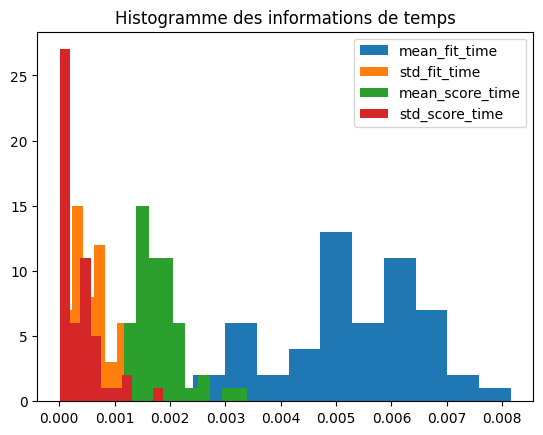

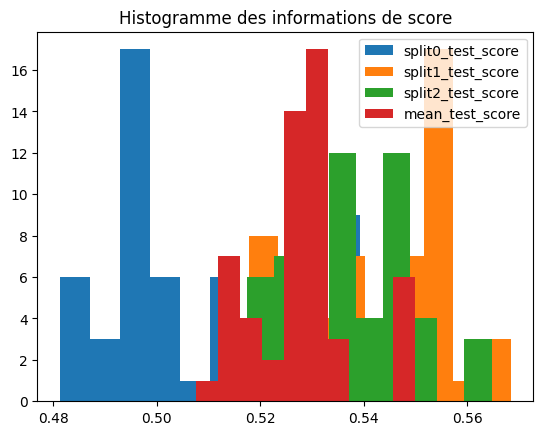

Le meilleur estimateur est : 
DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)
Best score with the best estimator : 
0.5500090178084149
-------------------------------------------------
Pour un nombre de passes k = 10 : 


Fitting 10 folds for each of 54 candidates, totalling 540 fits
Liste de valeurs avec leurs histogrammes : 
0         mean_fit_time
1          std_fit_time
2       mean_score_time
3        std_score_time
7     split0_test_score
8     split1_test_score
9     split2_test_score
10    split3_test_score
11    split4_test_score
12    split5_test_score
13    split6_test_score
14    split7_test_score
15    split8_test_score
16    split9_test_score
17      mean_test_score
Name: Name, dtype: object


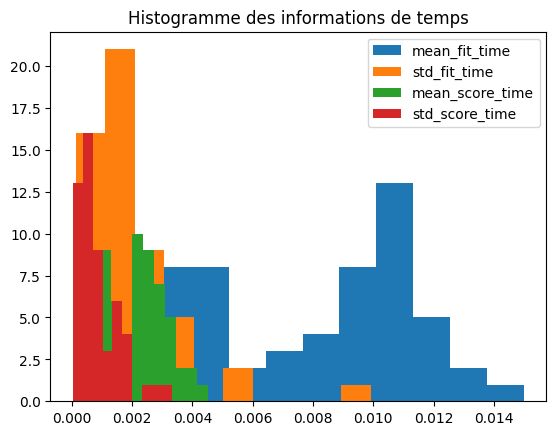

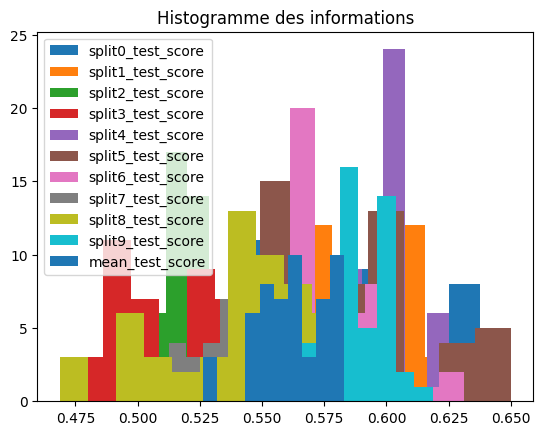

Le meilleur estimateur est : 
DecisionTreeClassifier(max_depth=5, min_samples_split=20, random_state=42)
Best score with the best estimator : 
0.583125


////////////////////////////////////////
echantillon_customers_noPIB4000


Pour un nombre de passes k = 3 : 


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Liste de valeurs avec leurs histogrammes : 
0         mean_fit_time
1          std_fit_time
2       mean_score_time
3        std_score_time
7     split0_test_score
8     split1_test_score
9     split2_test_score
10      mean_test_score
Name: Name, dtype: object


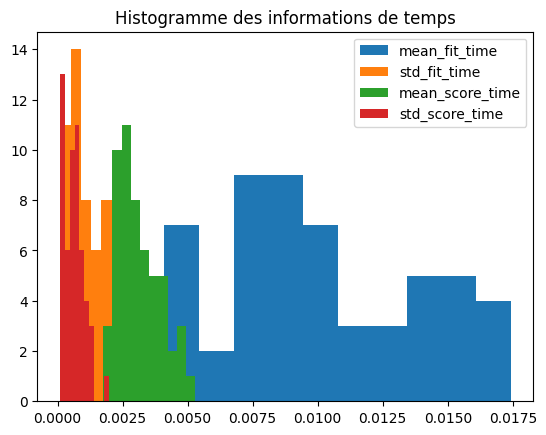

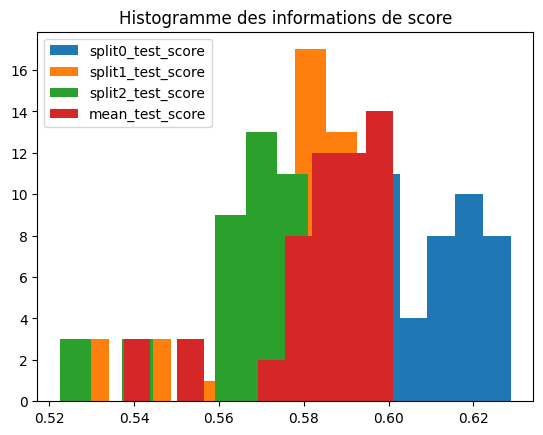

Le meilleur estimateur est : 
DecisionTreeClassifier(max_depth=12, min_samples_split=20, random_state=42)
Best score with the best estimator : 
0.6009358590449866
-------------------------------------------------
Pour un nombre de passes k = 10 : 


Fitting 10 folds for each of 54 candidates, totalling 540 fits
Liste de valeurs avec leurs histogrammes : 
0         mean_fit_time
1          std_fit_time
2       mean_score_time
3        std_score_time
7     split0_test_score
8     split1_test_score
9     split2_test_score
10    split3_test_score
11    split4_test_score
12    split5_test_score
13    split6_test_score
14    split7_test_score
15    split8_test_score
16    split9_test_score
17      mean_test_score
Name: Name, dtype: object


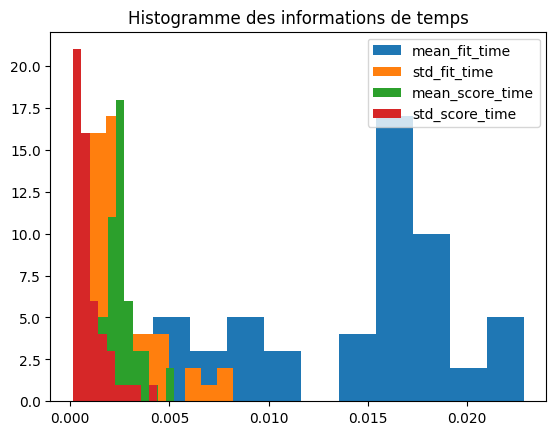

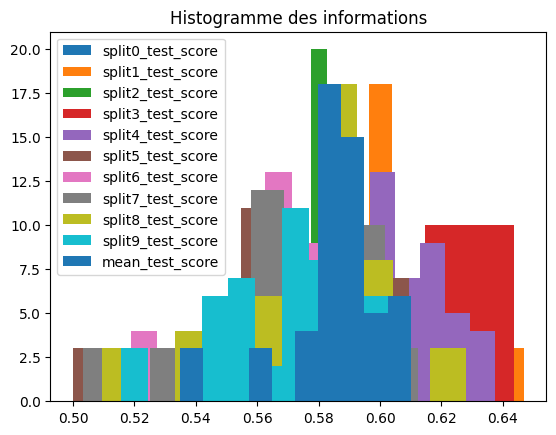

Le meilleur estimateur est : 
DecisionTreeClassifier(max_depth=8, min_samples_split=15, random_state=42)
Best score with the best estimator : 
0.61


////////////////////////////////////////
echantillon_customers_noPIB8000


Pour un nombre de passes k = 3 : 


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Liste de valeurs avec leurs histogrammes : 
0         mean_fit_time
1          std_fit_time
2       mean_score_time
3        std_score_time
7     split0_test_score
8     split1_test_score
9     split2_test_score
10      mean_test_score
Name: Name, dtype: object


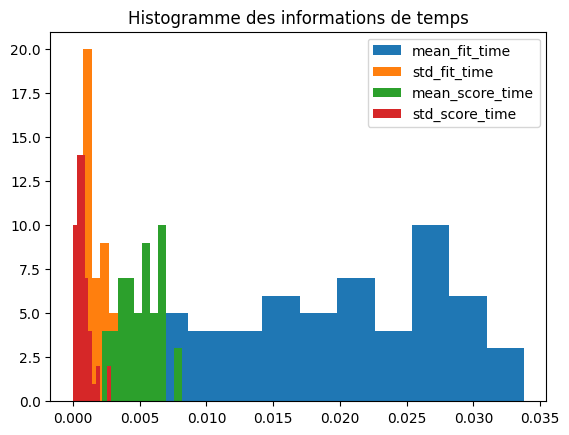

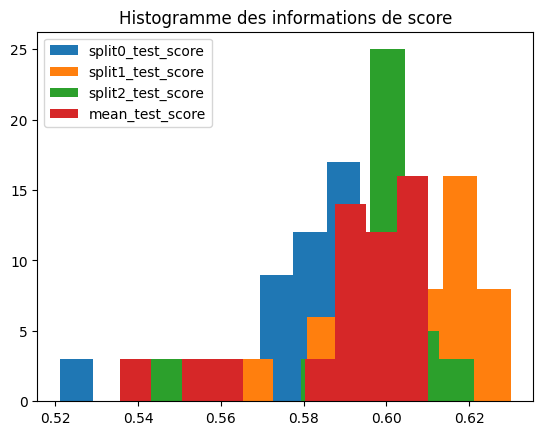

Le meilleur estimateur est : 
DecisionTreeClassifier(max_depth=12, min_samples_split=20, random_state=42)
Best score with the best estimator : 
0.6100026904977098
-------------------------------------------------
Pour un nombre de passes k = 10 : 


Fitting 10 folds for each of 54 candidates, totalling 540 fits
Liste de valeurs avec leurs histogrammes : 
0         mean_fit_time
1          std_fit_time
2       mean_score_time
3        std_score_time
7     split0_test_score
8     split1_test_score
9     split2_test_score
10    split3_test_score
11    split4_test_score
12    split5_test_score
13    split6_test_score
14    split7_test_score
15    split8_test_score
16    split9_test_score
17      mean_test_score
Name: Name, dtype: object


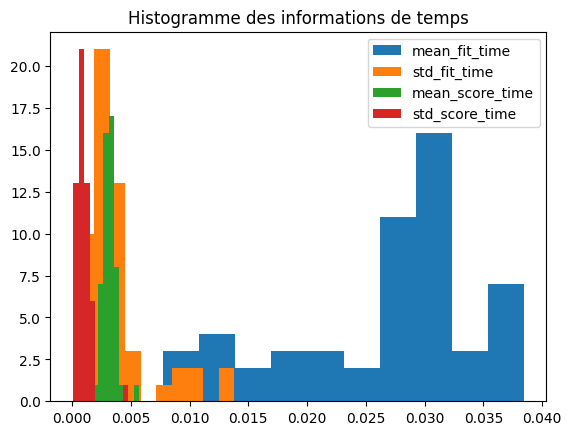

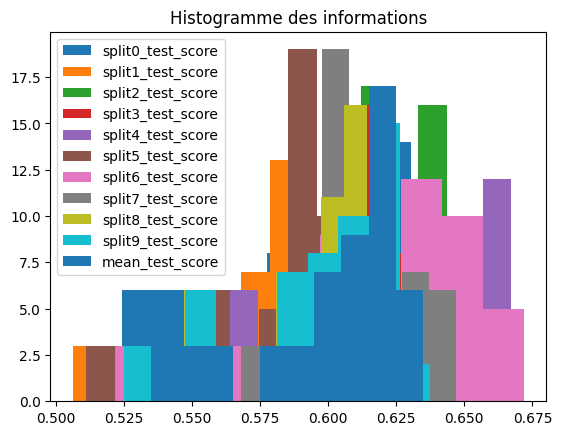

Le meilleur estimateur est : 
DecisionTreeClassifier(max_depth=11, min_samples_split=20, random_state=42)
Best score with the best estimator : 
0.63484375


////////////////////////////////////////
echantillon_customers_PIB2000


Pour un nombre de passes k = 3 : 


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Liste de valeurs avec leurs histogrammes : 
0         mean_fit_time
1          std_fit_time
2       mean_score_time
3        std_score_time
7     split0_test_score
8     split1_test_score
9     split2_test_score
10      mean_test_score
Name: Name, dtype: object


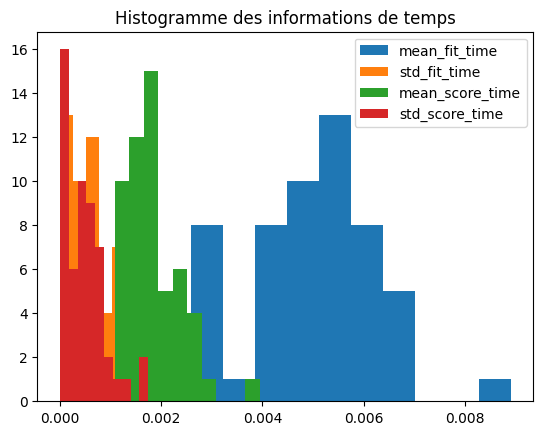

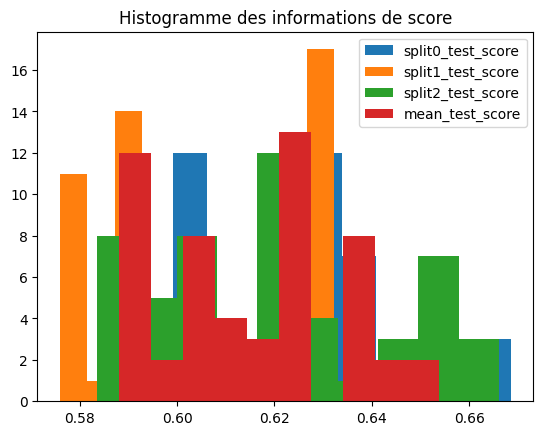

Le meilleur estimateur est : 
DecisionTreeClassifier(max_depth=6, min_samples_split=15, random_state=42)
Best score with the best estimator : 
0.653740750890655
-------------------------------------------------
Pour un nombre de passes k = 10 : 


Fitting 10 folds for each of 54 candidates, totalling 540 fits
Liste de valeurs avec leurs histogrammes : 
0         mean_fit_time
1          std_fit_time
2       mean_score_time
3        std_score_time
7     split0_test_score
8     split1_test_score
9     split2_test_score
10    split3_test_score
11    split4_test_score
12    split5_test_score
13    split6_test_score
14    split7_test_score
15    split8_test_score
16    split9_test_score
17      mean_test_score
Name: Name, dtype: object


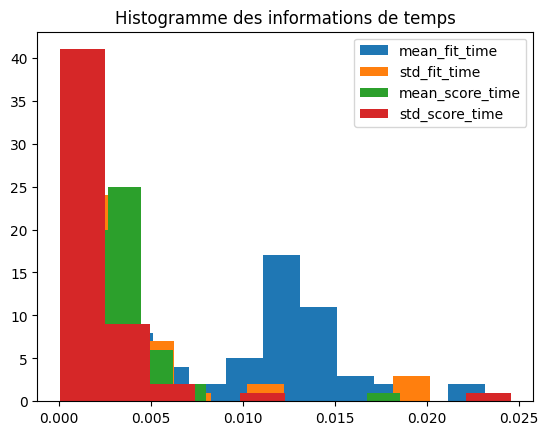

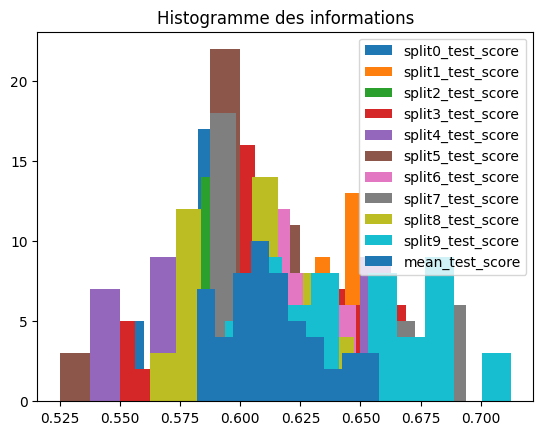

Le meilleur estimateur est : 
DecisionTreeClassifier(max_depth=5, min_samples_split=15, random_state=42)
Best score with the best estimator : 
0.6575


////////////////////////////////////////
echantillon_customers_PIB4000


Pour un nombre de passes k = 3 : 


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Liste de valeurs avec leurs histogrammes : 
0         mean_fit_time
1          std_fit_time
2       mean_score_time
3        std_score_time
7     split0_test_score
8     split1_test_score
9     split2_test_score
10      mean_test_score
Name: Name, dtype: object


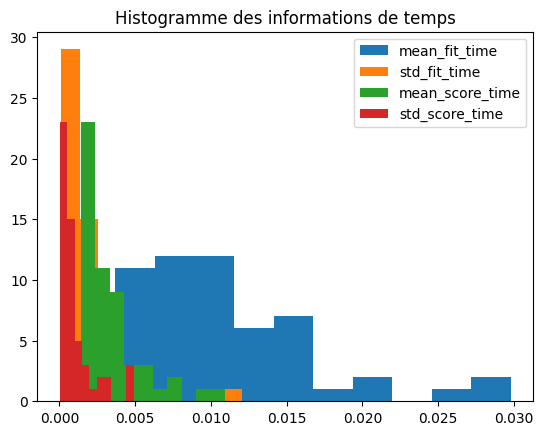

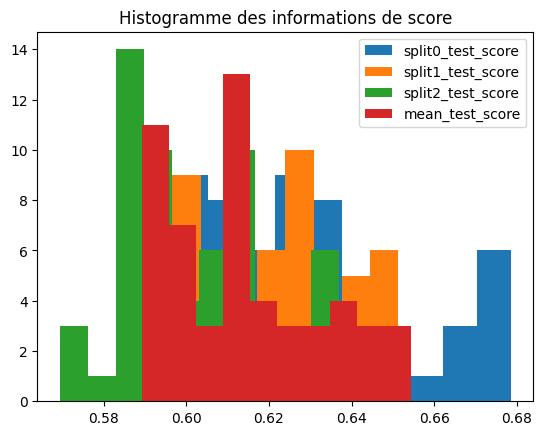

Le meilleur estimateur est : 
DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
Best score with the best estimator : 
0.654369559700211
-------------------------------------------------
Pour un nombre de passes k = 10 : 


Fitting 10 folds for each of 54 candidates, totalling 540 fits
Liste de valeurs avec leurs histogrammes : 
0         mean_fit_time
1          std_fit_time
2       mean_score_time
3        std_score_time
7     split0_test_score
8     split1_test_score
9     split2_test_score
10    split3_test_score
11    split4_test_score
12    split5_test_score
13    split6_test_score
14    split7_test_score
15    split8_test_score
16    split9_test_score
17      mean_test_score
Name: Name, dtype: object


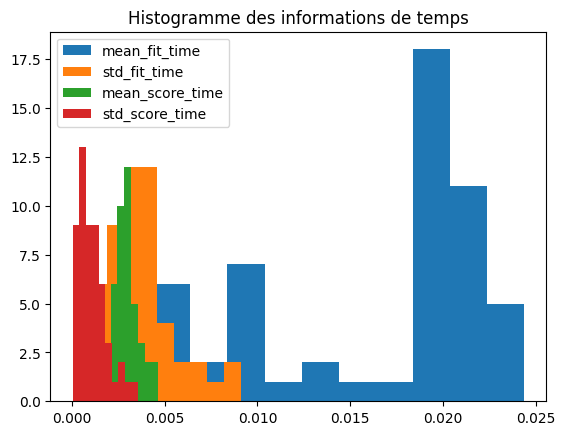

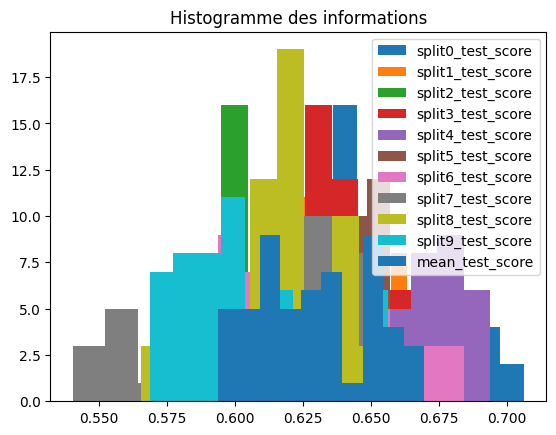

Le meilleur estimateur est : 
DecisionTreeClassifier(max_depth=6, min_samples_split=20, random_state=42)
Best score with the best estimator : 
0.6696875


////////////////////////////////////////
echantillon_customers_PIB8000


Pour un nombre de passes k = 3 : 


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Liste de valeurs avec leurs histogrammes : 
0         mean_fit_time
1          std_fit_time
2       mean_score_time
3        std_score_time
7     split0_test_score
8     split1_test_score
9     split2_test_score
10      mean_test_score
Name: Name, dtype: object


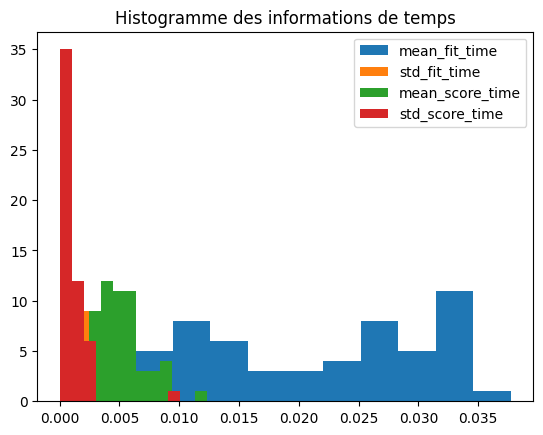

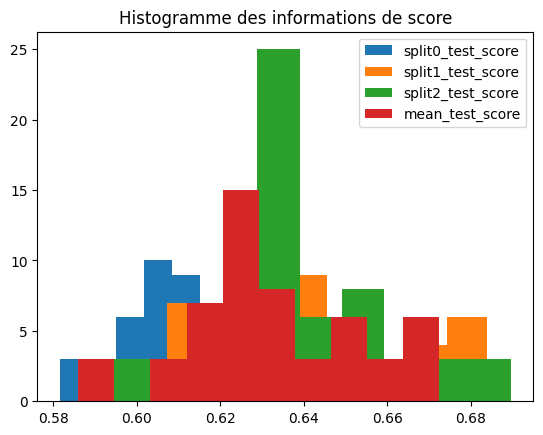

Le meilleur estimateur est : 
DecisionTreeClassifier(max_depth=6, min_samples_split=20, random_state=42)
Best score with the best estimator : 
0.6725044022664624
-------------------------------------------------
Pour un nombre de passes k = 10 : 


Fitting 10 folds for each of 54 candidates, totalling 540 fits
Liste de valeurs avec leurs histogrammes : 
0         mean_fit_time
1          std_fit_time
2       mean_score_time
3        std_score_time
7     split0_test_score
8     split1_test_score
9     split2_test_score
10    split3_test_score
11    split4_test_score
12    split5_test_score
13    split6_test_score
14    split7_test_score
15    split8_test_score
16    split9_test_score
17      mean_test_score
Name: Name, dtype: object


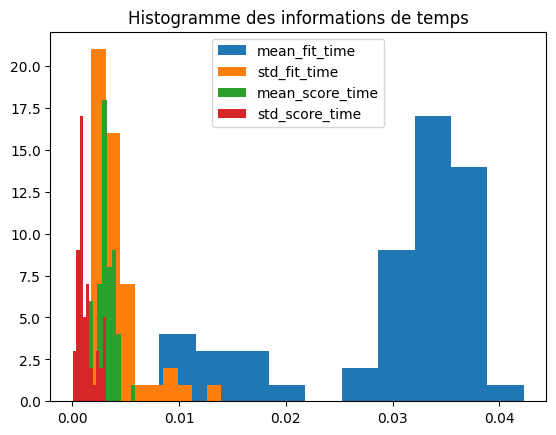

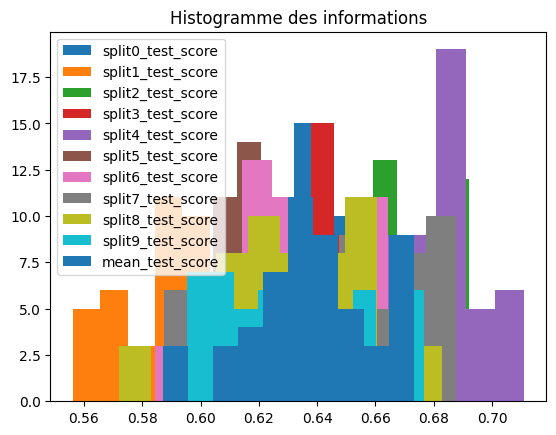

Le meilleur estimateur est : 
DecisionTreeClassifier(max_depth=6, min_samples_split=10, random_state=42)
Best score with the best estimator : 
0.673125


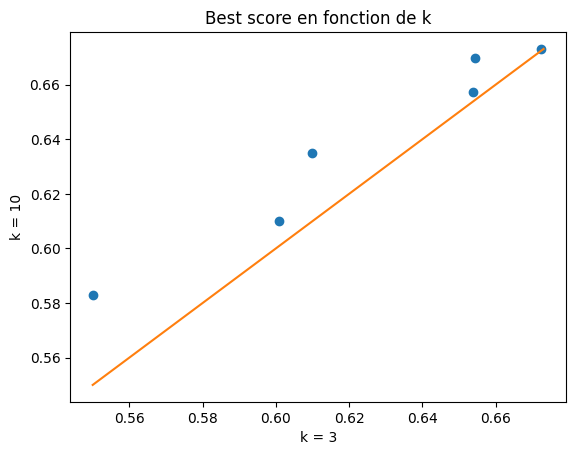

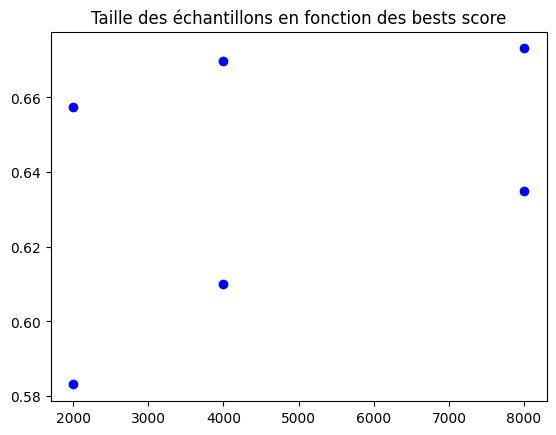

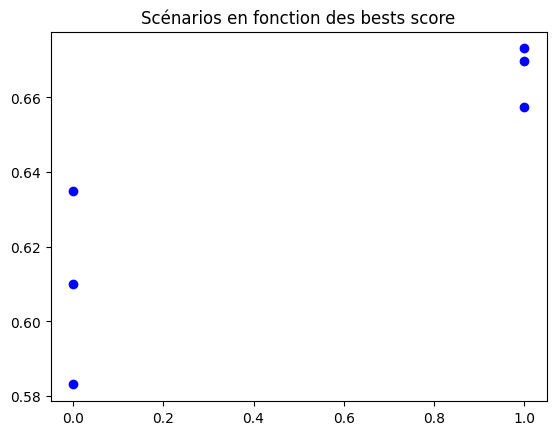


Liste des (max_depth, min_samples_split) des bests score de chaques échantillons pour k = 3 : 
 [[[5, 20]], [[12, 20]], [[12, 20]], [[6, 15]], [[5, 10]], [[6, 20]]]

Liste des (max_depth, min_samples_split) des bests score de chaques échantillons pour k = 10
 [[[5, 20]], [[8, 15]], [[11, 20]], [[5, 15]], [[6, 20]], [[6, 10]]]


In [22]:
k3 =[]
k10 = []

hyper_k3 = []
hyper_k10 = []


for echantillon in params_echantillon:
    print("\n\n////////////////////////////////////////\n" + echantillon.name + "\n\n")
    #Appel de la fonction
    k3_score, k10_score, hyperparams_k3, hyperparams_k10  = informations_resultats(echantillon)
    k3.append(k3_score)
    k10.append(k10_score)
    hyper_k3.append(hyperparams_k3)
    hyper_k10.append(hyperparams_k10)

#Retourne un graphique des échantillons en fonction des best scores
x1 = k3
y1 = k10
x2 = [min(min(k3),min(k10)),max(max(k3),max(k10))]
y2 = [min(min(k3),min(k10)),max(max(k3),max(k10))]
# Define x and y axes
plt.plot(x1, 
        y1,
        'o')
plt.plot(x2,y2)
# Set plot title and axes labels
plt.title("Best score en fonction de k")
plt.xlabel("k = 3")
plt.ylabel("k = 10")

plt.show()


#Retourne un graphique de la taille des échantillon en fonction des scores (k = 10)
plt.plot(params_taille_echantillon, k10, 'bo')
plt.title("Taille des échantillons en fonction des bests score")
plt.show()

#Retourne un graphique du scénario en fonction des scores (k = 10)
plt.plot(params_PIB_noPIB, k10, 'bo')
plt.title("Scénarios en fonction des bests score")
plt.show()

#Retourne la liste des (max_depth, min_samples_split) des bests score de chaques échantillons pour k = 3
print("\nListe des (max_depth, min_samples_split) des bests score de chaques échantillons pour k = 3 : \n", hyper_k3) 

#Retourne la liste des (max_depth, min_samples_split) des bests score de chaques échantillons pour k = 10
print("\nListe des (max_depth, min_samples_split) des bests score de chaques échantillons pour k = 10\n", hyper_k10)

## Meilleur classeur pour discriminer les 3 revenus

Il est logique que le meilleur pouvant traiter 3 revenus est le classeur multi-classe car le classeur binaire ne va donner des informations seulement sur deux revenus différents.

## Classeur binaire VS Classeur multi-classes

On voit directement que le classeur multi-classes a une moins bonne fiabilité. Cependant, on retrouve les mêmes observations que pour le classeur binaire. Le scénario 2 ayant de meilleur score que le scénario 1. La valeur k = 10 ayant une meilleur fiabilité que k = 3 (cette fois-ci pour les deux scénarios). Enfin, on peut compléter une observation vu précedemment sur la graphique 'taille des échantillons en fonction des bests scores' où l'on observe de nouveau une tendance à tendre vers une valeur lorsque la taille de l'échantillon augmente. On peut l'interpréter de manière logique en ayant une meilleur fiabilité plus l'on entraîne le modèle sur un plus grand dataset.
